<a href="https://colab.research.google.com/github/aiswarya-sureshkumar/OIBSIP_taskno.3/blob/main/Sales%20Prediction%20with%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction with Machine Learning**

**Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/Advertising (1).csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Data Exploration**

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Data Preprocessing**

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
x=df.iloc[:,:-1]
x
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Regression plot**

<Axes: xlabel='TV', ylabel='Sales'>

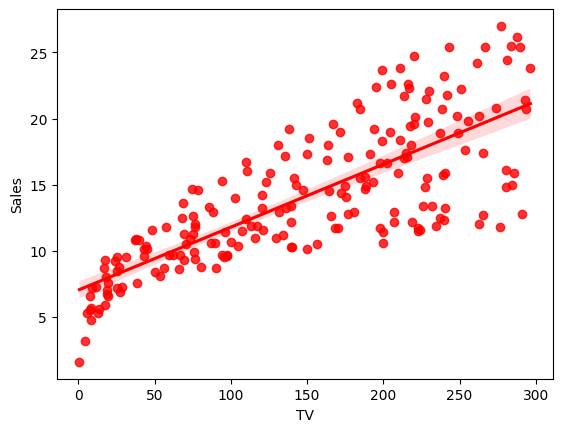

In [ ]:
# TV vs Sales
sns.regplot(x=df['TV'],y=y,color='r')

<Axes: xlabel='Radio', ylabel='Sales'>

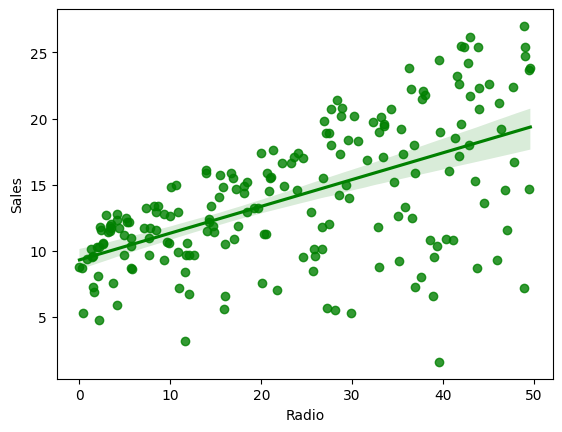

In [ ]:
# Radio vs Sales
sns.regplot(x=df['Radio'],y=y,color='g')

<Axes: xlabel='Newspaper', ylabel='Sales'>

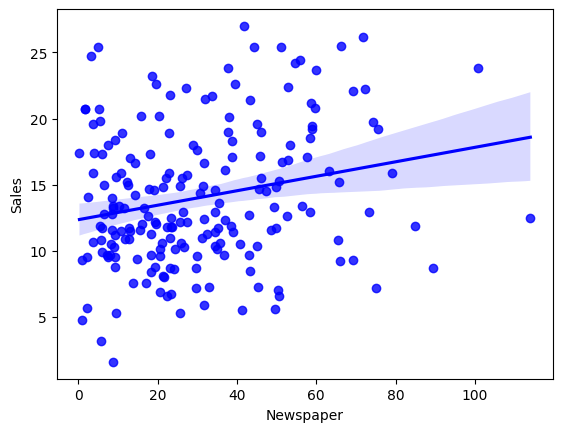

In [ ]:
# Newspaper vs Sales
sns.regplot(x=df['Newspaper'],y=y,color='b')

**Splitting into Training and Testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Model creation and Performance evaluation**

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('error %',mean_absolute_percentage_error(y_test,y_pred))
print('r2 score',r2_score(y_test,y_pred))

error % 0.16298720118158336
r2 score 0.8609466508230368


In [ ]:
# Desicion Tree model
from sklearn.tree import DecisionTreeRegressor
t_model=DecisionTreeRegressor()
t_model.fit(x_train,y_train)
t_y_pred=t_model.predict(x_test)
print('error %',mean_absolute_percentage_error(y_test,t_y_pred))
print('r2 score',r2_score(y_test,t_y_pred))

error % 0.09614860668161146
r2 score 0.9292305053512029


In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)
rf_y_pred=rf_model.predict(x_test)
print('error %',mean_absolute_percentage_error(y_test,rf_y_pred))
print('r2 score',r2_score(y_test,rf_y_pred))

error % 0.05166695470481828
r2 score 0.9841761204534155
